In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
import string
import tensorflow
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [3]:
!pip install scikeras

In [4]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC, LinearSVC

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from scikeras.wrappers import KerasClassifier
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [5]:
data = pd.read_csv("cardio_train.csv", sep=";")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
data.drop("id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"]>250) | (data["ap_lo"]>200))
data = data[~out_filter]  # not

In [7]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [8]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))   #  making sure all above 0
data = data[~out_filter2]

In [9]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [10]:
# Assuming your dataset is stored in a variable called 'df'
# Convert age from days to years
data['age'] = (data['age'] / 365).astype(int)

# Display the updated dataset
print(data)


       age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0       50       2     168    62.0    110     80            1     1      0   
1       55       1     156    85.0    140     90            3     1      0   
2       51       1     165    64.0    130     70            3     1      0   
3       48       2     169    82.0    150    100            1     1      0   
4       47       1     156    56.0    100     60            1     1      0   
...    ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995   52       2     168    76.0    120     80            1     1      1   
69996   61       1     158   126.0    140     90            2     2      0   
69997   52       2     183   105.0    180     90            3     1      0   
69998   61       1     163    72.0    135     80            1     2      0   
69999   56       1     170    72.0    120     80            2     1      0   

       alco  active  cardio        bmi  
0         0       1   

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68975 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68975 non-null  int64  
 1   gender       68975 non-null  int64  
 2   height       68975 non-null  int64  
 3   weight       68975 non-null  float64
 4   ap_hi        68975 non-null  int64  
 5   ap_lo        68975 non-null  int64  
 6   cholesterol  68975 non-null  int64  
 7   gluc         68975 non-null  int64  
 8   smoke        68975 non-null  int64  
 9   alco         68975 non-null  int64  
 10  active       68975 non-null  int64  
 11  cardio       68975 non-null  int64  
 12  bmi          68975 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.4 MB


In [12]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000,68975.000000
mean,52.826923,1.348793,164.359681,74.121414,126.324842,81.334585,1.364509,1.225937,0.087901,0.053614,0.803277,0.494947,27.525663
std,6.769931,0.476592,8.205382,14.329915,17.710918,9.874490,0.678783,0.571896,0.283154,0.225255,0.397524,0.499978,6.081430
min,29.000000,1.000000,55.000000,11.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.346494
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.119376
max,64.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,298.666667


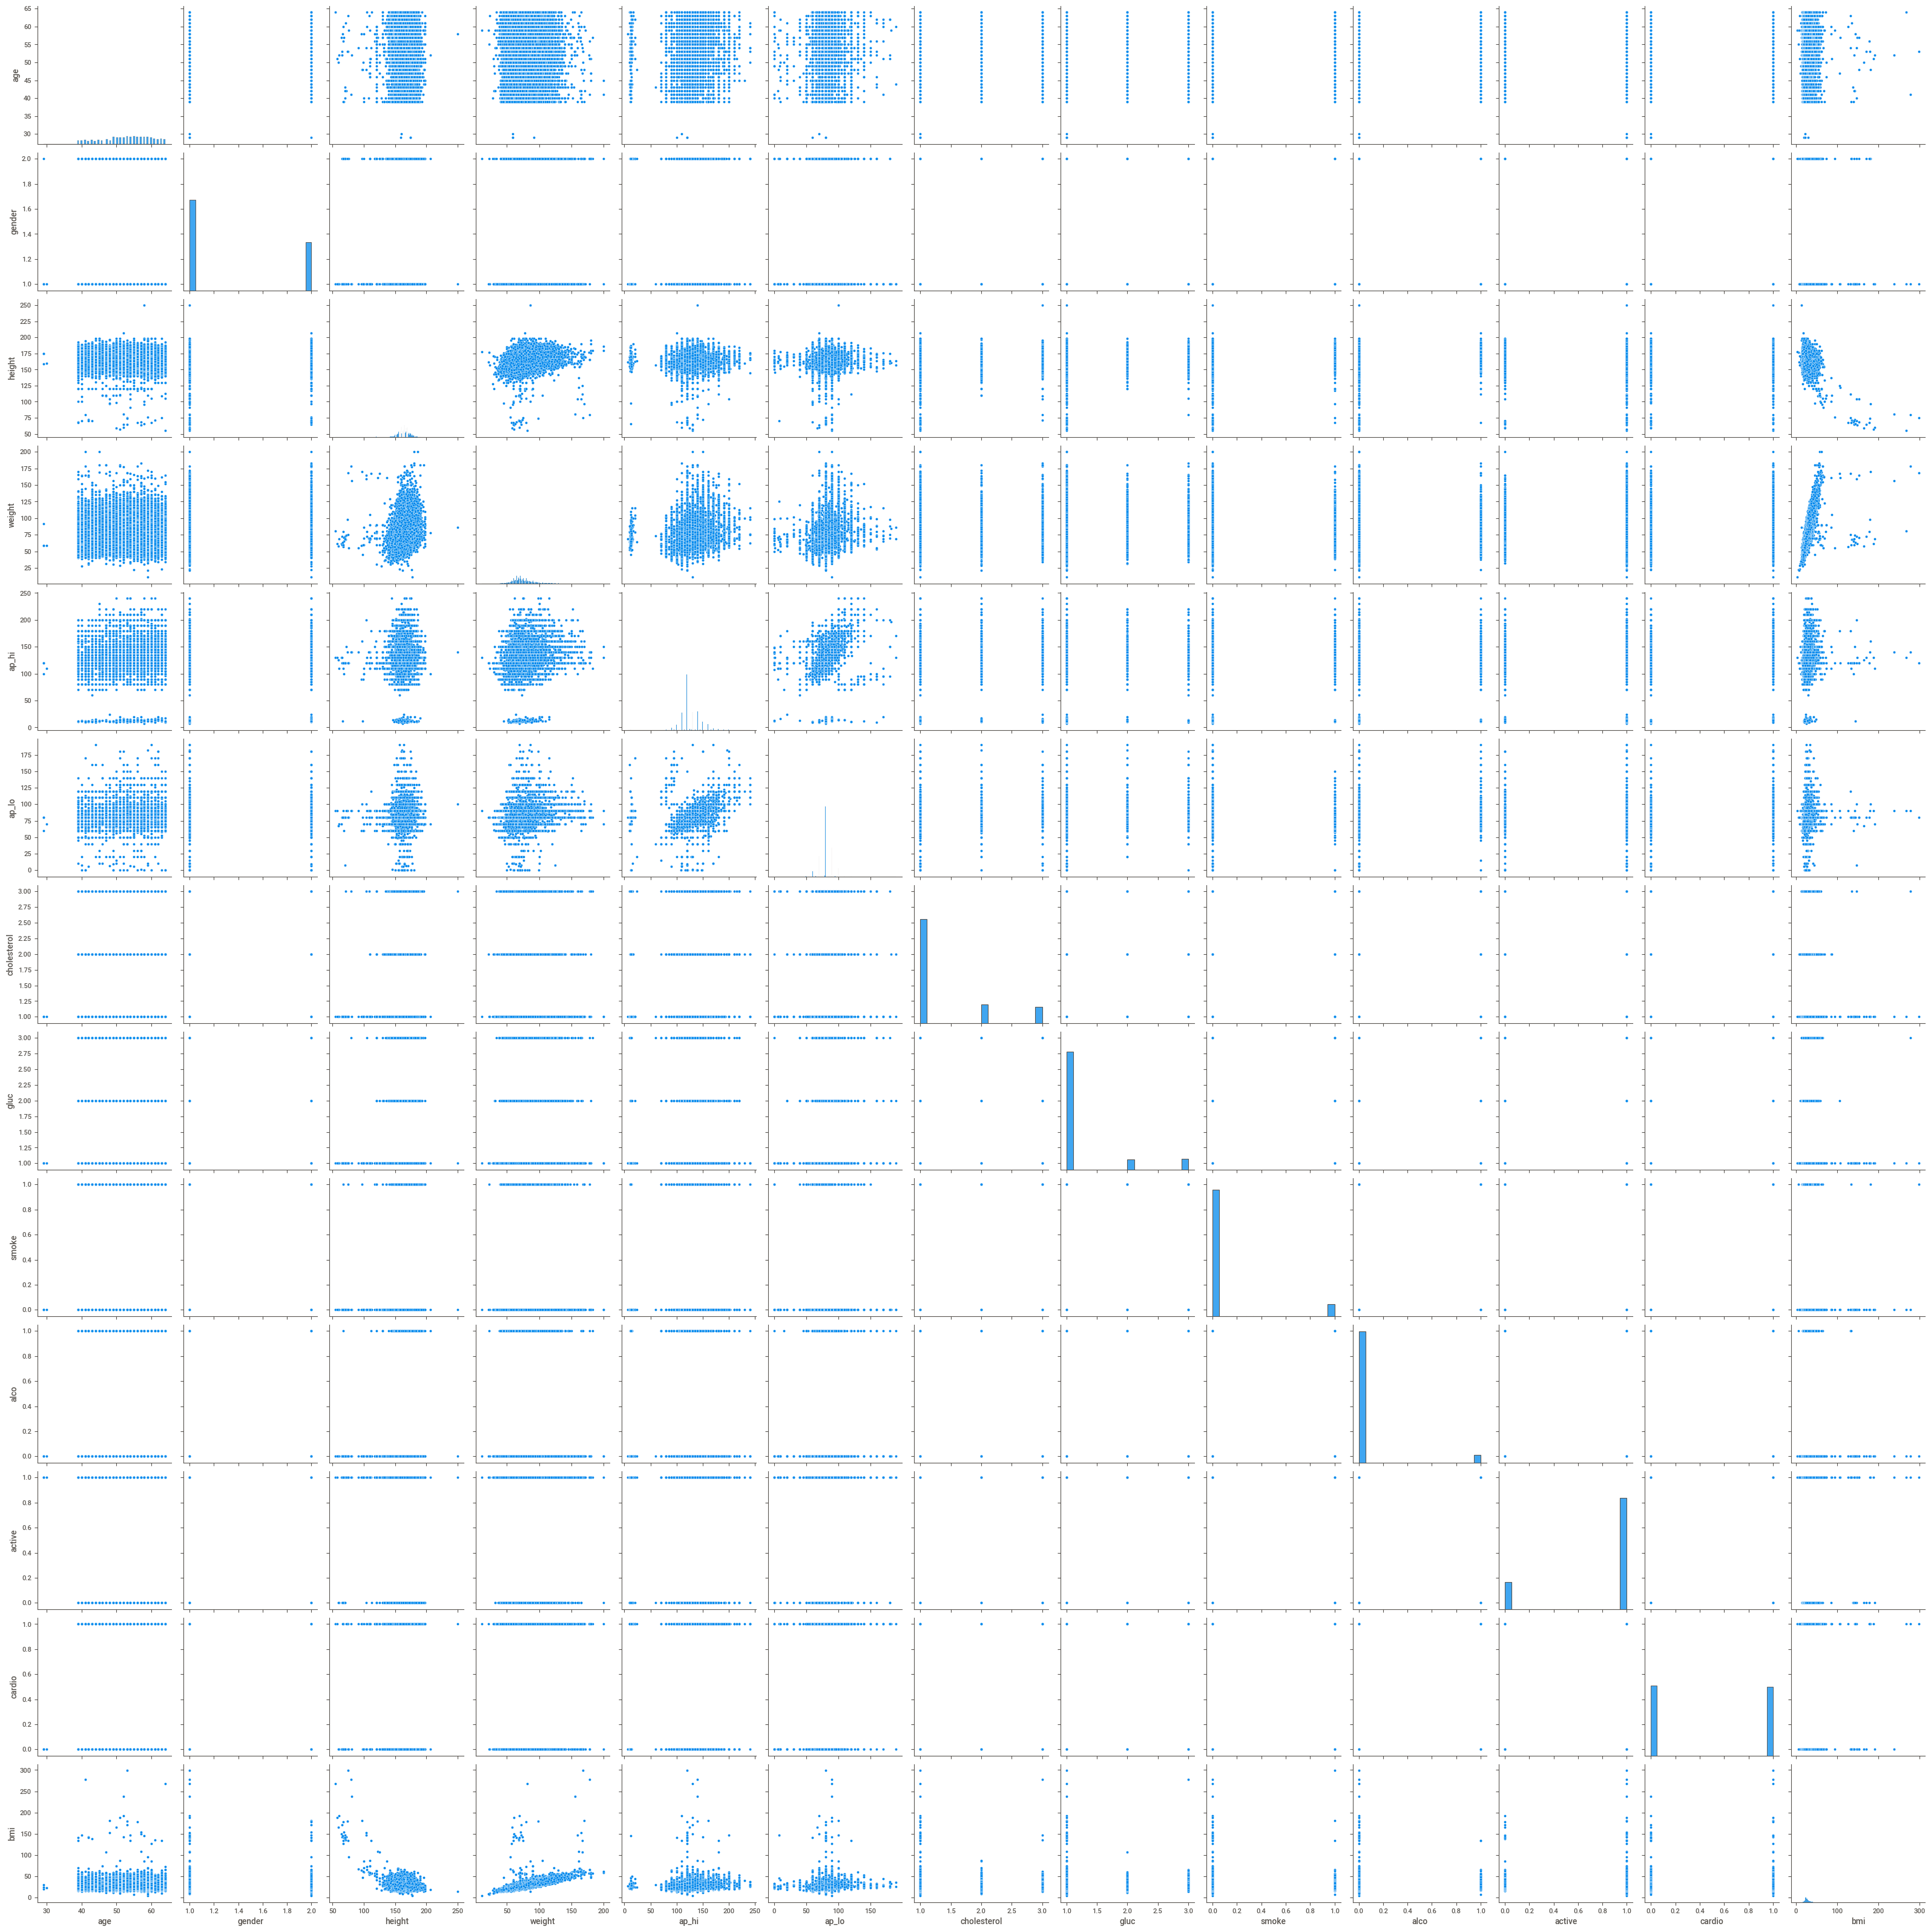

In [ ]:
sns.pairplot(data)

In [ ]:
!pip install sweetviz

In [ ]:
import sweetviz as sv
sweet_report = sv.analyze(data)
sweet_report.show_html()
sweet_report.show_html('multidisease.html', scale=0.92)

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
Report multidisease.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [13]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

In [14]:
X

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,2,168,76.0,120,80,1,1,1,0,1,26.927438
69996,61,1,158,126.0,140,90,2,2,0,0,1,50.472681
69997,52,2,183,105.0,180,90,3,1,0,1,0,31.353579
69998,61,1,163,72.0,135,80,1,2,0,0,0,27.099251


In [15]:
print(X.shape)
print(y.shape)

(68975, 12)
(68975,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
Xtrain, Xtest, y_val, y_valt = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
# svc = SVC()
# svc.fit(X_train, y_train)
# acc_svc = round(svc.score(X_train, y_train)*100, 2)
# acc_svc

In [ ]:
linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(X_train, y_train)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

72.43

In [ ]:
acc_test_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_test_linear_svc

72.71

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

97.99

In [ ]:
acc_test_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_test_decision_tree

64.33

In [ ]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(),
                             param_grid={'n_estimators': [100, 200, 300]}, cv=3).fit(X_train, y_train)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest, random_forest.best_params_)

97.99 {'n_estimators': 300}


In [ ]:
acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_test_random_forest

71.34

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, kernel_initializer='he_normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                208       
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 64)                1088      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3409 (13.32 KB)
Trainable params: 3409 (

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', patience=20, mode='max')

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=512, verbose=1, callbacks=[es])

Epoch 1/512
858/863 [============================>.] - ETA: 0s - loss: 2.2079 - accuracy: 0.5671

863/863 [==============================] - 2s 1ms/step - loss: 2.2006 - accuracy: 0.5671
Epoch 2/512
848/863 [============================>.] - ETA: 0s - loss: 0.6607 - accuracy: 0.6331

863/863 [==============================] - 1s 1ms/step - loss: 0.6600 - accuracy: 0.6339
Epoch 3/512
852/863 [============================>.] - ETA: 0s - loss: 0.6230 - accuracy: 0.6663

863/863 [==============================] - 2s 2ms/step - loss: 0.6232 - accuracy: 0.6660
Epoch 4/512
832/863 [===========================>..] - ETA: 0s - loss: 0.6133 - accuracy: 0.6709

863/863 [==============================] - 1s 1ms/step - loss: 0.6130 - accuracy: 0.6714
Epoch 5/512
837/863 [============================>.] - ETA: 0s - loss: 0.6067 - accuracy: 0.6784

863/863 [==============================] - 1s 1ms/step - loss: 0.6073 - accuracy: 0.6777
Epoch 6/512
859/863 [============================>.] - ETA: 0s - loss: 0.6038 - accuracy: 0.6806

863/863 [==============================] - 1s 1ms/step - loss: 0.6036 - accuracy: 0.6808
Epoch 7/512
831/863 [===========================>..] - ETA: 0s - loss: 0.6003 - accuracy: 0.6864

863/863 [==============================] - 1s 1ms/step - loss: 0.5997 - accuracy: 0.6865
Epoch 8/512
836/863 [============================>.] - ETA: 0s - loss: 0.5962 - accuracy: 0.6919

863/863 [==============================] - 1s 1ms/step - loss: 0.5957 - accuracy: 0.6921
Epoch 9/512
840/863 [============================>.] - ETA: 0s - loss: 0.5917 - accuracy: 0.6957

863/863 [==============================] - 1s 1ms/step - loss: 0.5916 - accuracy: 0.6959
Epoch 10/512
855/863 [============================>.] - ETA: 0s - loss: 0.5885 - accuracy: 0.6993

863/863 [==============================] - 1s 1ms/step - loss: 0.5888 - accuracy: 0.6991
Epoch 11/512
856/863 [============================>.] - ETA: 0s - loss: 0.5870 - accuracy: 0.7004

863/863 [==============================] - 1s 1ms/step - loss: 0.5873 - accuracy: 0.7001
Epoch 12/512
856/863 [============================>.] - ETA: 0s - loss: 0.5826 - accuracy: 0.7028

863/863 [==============================] - 2s 2ms/step - loss: 0.5824 - accuracy: 0.7030
Epoch 13/512
855/863 [============================>.] - ETA: 0s - loss: 0.5812 - accuracy: 0.7064

863/863 [==============================] - 1s 1ms/step - loss: 0.5812 - accuracy: 0.7063
Epoch 14/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5786 - accuracy: 0.7094

863/863 [==============================] - 1s 1ms/step - loss: 0.5783 - accuracy: 0.7098
Epoch 15/512
856/863 [============================>.] - ETA: 0s - loss: 0.5765 - accuracy: 0.7090

863/863 [==============================] - 1s 1ms/step - loss: 0.5764 - accuracy: 0.7092
Epoch 16/512
841/863 [============================>.] - ETA: 0s - loss: 0.5739 - accuracy: 0.7132

863/863 [==============================] - 1s 1ms/step - loss: 0.5744 - accuracy: 0.7127
Epoch 17/512
839/863 [============================>.] - ETA: 0s - loss: 0.5730 - accuracy: 0.7143

863/863 [==============================] - 1s 1ms/step - loss: 0.5731 - accuracy: 0.7142
Epoch 18/512
849/863 [============================>.] - ETA: 0s - loss: 0.5707 - accuracy: 0.7162

863/863 [==============================] - 1s 1ms/step - loss: 0.5703 - accuracy: 0.7166
Epoch 19/512
861/863 [============================>.] - ETA: 0s - loss: 0.5728 - accuracy: 0.7132

863/863 [==============================] - 1s 1ms/step - loss: 0.5728 - accuracy: 0.7131
Epoch 20/512
826/863 [===========================>..] - ETA: 0s - loss: 0.5704 - accuracy: 0.7152

863/863 [==============================] - 1s 1ms/step - loss: 0.5707 - accuracy: 0.7149
Epoch 21/512
846/863 [============================>.] - ETA: 0s - loss: 0.5678 - accuracy: 0.7172

863/863 [==============================] - 2s 2ms/step - loss: 0.5681 - accuracy: 0.7170
Epoch 22/512
842/863 [============================>.] - ETA: 0s - loss: 0.5686 - accuracy: 0.7172

863/863 [==============================] - 1s 1ms/step - loss: 0.5686 - accuracy: 0.7172
Epoch 23/512
848/863 [============================>.] - ETA: 0s - loss: 0.5667 - accuracy: 0.7184

863/863 [==============================] - 1s 1ms/step - loss: 0.5671 - accuracy: 0.7179
Epoch 24/512
851/863 [============================>.] - ETA: 0s - loss: 0.5660 - accuracy: 0.7168

863/863 [==============================] - 1s 1ms/step - loss: 0.5657 - accuracy: 0.7172
Epoch 25/512
835/863 [============================>.] - ETA: 0s - loss: 0.5662 - accuracy: 0.7189

863/863 [==============================] - 1s 1ms/step - loss: 0.5665 - accuracy: 0.7185
Epoch 26/512
837/863 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.7201

863/863 [==============================] - 1s 1ms/step - loss: 0.5647 - accuracy: 0.7196
Epoch 27/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5635 - accuracy: 0.7192

863/863 [==============================] - 1s 1ms/step - loss: 0.5637 - accuracy: 0.7193
Epoch 28/512
846/863 [============================>.] - ETA: 0s - loss: 0.5650 - accuracy: 0.7193

863/863 [==============================] - 1s 1ms/step - loss: 0.5650 - accuracy: 0.7191
Epoch 29/512
837/863 [============================>.] - ETA: 0s - loss: 0.5638 - accuracy: 0.7164

863/863 [==============================] - 1s 1ms/step - loss: 0.5635 - accuracy: 0.7168
Epoch 30/512
841/863 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.7200

863/863 [==============================] - 2s 2ms/step - loss: 0.5618 - accuracy: 0.7197
Epoch 31/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5611 - accuracy: 0.7198

863/863 [==============================] - 1s 1ms/step - loss: 0.5617 - accuracy: 0.7195
Epoch 32/512
837/863 [============================>.] - ETA: 0s - loss: 0.5636 - accuracy: 0.7179

863/863 [==============================] - 1s 1ms/step - loss: 0.5632 - accuracy: 0.7184
Epoch 33/512
839/863 [============================>.] - ETA: 0s - loss: 0.5628 - accuracy: 0.7194

863/863 [==============================] - 1s 1ms/step - loss: 0.5629 - accuracy: 0.7193
Epoch 34/512
826/863 [===========================>..] - ETA: 0s - loss: 0.5616 - accuracy: 0.7213

863/863 [==============================] - 1s 1ms/step - loss: 0.5614 - accuracy: 0.7213
Epoch 35/512
862/863 [============================>.] - ETA: 0s - loss: 0.5612 - accuracy: 0.7215

863/863 [==============================] - 1s 1ms/step - loss: 0.5612 - accuracy: 0.7215
Epoch 36/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5594 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7232
Epoch 37/512
848/863 [============================>.] - ETA: 0s - loss: 0.5600 - accuracy: 0.7212

863/863 [==============================] - 1s 1ms/step - loss: 0.5602 - accuracy: 0.7210
Epoch 38/512
842/863 [============================>.] - ETA: 0s - loss: 0.5616 - accuracy: 0.7209

863/863 [==============================] - 1s 1ms/step - loss: 0.5617 - accuracy: 0.7210
Epoch 39/512
858/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7225

863/863 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7226
Epoch 40/512
825/863 [===========================>..] - ETA: 0s - loss: 0.5598 - accuracy: 0.7209

863/863 [==============================] - 1s 2ms/step - loss: 0.5593 - accuracy: 0.7215
Epoch 41/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5595 - accuracy: 0.7204

863/863 [==============================] - 1s 1ms/step - loss: 0.5593 - accuracy: 0.7207
Epoch 42/512
848/863 [============================>.] - ETA: 0s - loss: 0.5599 - accuracy: 0.7210

863/863 [==============================] - 1s 1ms/step - loss: 0.5595 - accuracy: 0.7211
Epoch 43/512
829/863 [===========================>..] - ETA: 0s - loss: 0.5574 - accuracy: 0.7227

863/863 [==============================] - 1s 1ms/step - loss: 0.5578 - accuracy: 0.7226
Epoch 44/512
863/863 [==============================] - ETA: 0s - loss: 0.5604 - accuracy: 0.7215

863/863 [==============================] - 1s 1ms/step - loss: 0.5604 - accuracy: 0.7215
Epoch 45/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5591 - accuracy: 0.7224

863/863 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7229
Epoch 46/512
851/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7233
Epoch 47/512
840/863 [============================>.] - ETA: 0s - loss: 0.5587 - accuracy: 0.7200

863/863 [==============================] - 1s 1ms/step - loss: 0.5586 - accuracy: 0.7202
Epoch 48/512
853/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7216

863/863 [==============================] - 1s 2ms/step - loss: 0.5584 - accuracy: 0.7218
Epoch 49/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5574 - accuracy: 0.7227

863/863 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7221
Epoch 50/512
839/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7240
Epoch 51/512
860/863 [============================>.] - ETA: 0s - loss: 0.5578 - accuracy: 0.7223

863/863 [==============================] - 1s 1ms/step - loss: 0.5579 - accuracy: 0.7221
Epoch 52/512
845/863 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.7222

863/863 [==============================] - 1s 1ms/step - loss: 0.5588 - accuracy: 0.7223
Epoch 53/512
847/863 [============================>.] - ETA: 0s - loss: 0.5605 - accuracy: 0.7217

863/863 [==============================] - 1s 1ms/step - loss: 0.5607 - accuracy: 0.7216
Epoch 54/512
836/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7229

863/863 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7229
Epoch 55/512
838/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7233

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7230
Epoch 56/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5574 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7248
Epoch 57/512
843/863 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.7254

863/863 [==============================] - 1s 2ms/step - loss: 0.5576 - accuracy: 0.7250
Epoch 58/512
849/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7253

863/863 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7249
Epoch 59/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5574 - accuracy: 0.7231

863/863 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7229
Epoch 60/512
852/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7244
Epoch 61/512
843/863 [============================>.] - ETA: 0s - loss: 0.5577 - accuracy: 0.7227

863/863 [==============================] - 1s 1ms/step - loss: 0.5569 - accuracy: 0.7233
Epoch 62/512
840/863 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7223

863/863 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7221
Epoch 63/512
828/863 [===========================>..] - ETA: 0s - loss: 0.5566 - accuracy: 0.7218

863/863 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7217
Epoch 64/512
849/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7235
Epoch 65/512
853/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7248

863/863 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7247
Epoch 66/512
861/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7219

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7218
Epoch 67/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5559 - accuracy: 0.7251

863/863 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7248
Epoch 68/512
861/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7237
Epoch 69/512
841/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7246
Epoch 70/512
854/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7231

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7227
Epoch 71/512
845/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7250
Epoch 72/512
855/863 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7224

863/863 [==============================] - 1s 1ms/step - loss: 0.5576 - accuracy: 0.7224
Epoch 73/512
855/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7250
Epoch 74/512
838/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7233

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7236
Epoch 75/512
842/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7236
Epoch 76/512
862/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7232

863/863 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7232
Epoch 77/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5567 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5565 - accuracy: 0.7233
Epoch 78/512
862/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7242
Epoch 79/512
849/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7228

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7229
Epoch 80/512
843/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7239
Epoch 81/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7262

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7258
Epoch 82/512
841/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7246
Epoch 83/512
863/863 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7254
Epoch 84/512
855/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7245
Epoch 85/512
862/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7240

863/863 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7239
Epoch 86/512
827/863 [===========================>..] - ETA: 0s - loss: 0.5565 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7240
Epoch 87/512
860/863 [============================>.] - ETA: 0s - loss: 0.5568 - accuracy: 0.7224

863/863 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7224
Epoch 88/512
852/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7237
Epoch 89/512
851/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7244
Epoch 90/512
856/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7241
Epoch 91/512
850/863 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5574 - accuracy: 0.7247
Epoch 92/512
862/863 [============================>.] - ETA: 0s - loss: 0.5586 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5586 - accuracy: 0.7245
Epoch 93/512
852/863 [============================>.] - ETA: 0s - loss: 0.5589 - accuracy: 0.7218

863/863 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7223
Epoch 94/512
857/863 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.7231

863/863 [==============================] - 2s 2ms/step - loss: 0.5591 - accuracy: 0.7233
Epoch 95/512
844/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7248

863/863 [==============================] - 1s 2ms/step - loss: 0.5564 - accuracy: 0.7251
Epoch 96/512
844/863 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7248
Epoch 97/512
844/863 [============================>.] - ETA: 0s - loss: 0.5590 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5588 - accuracy: 0.7242
Epoch 98/512
855/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7235
Epoch 99/512
850/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7229

863/863 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7228
Epoch 100/512
845/863 [============================>.] - ETA: 0s - loss: 0.5576 - accuracy: 0.7232

863/863 [==============================] - 1s 1ms/step - loss: 0.5577 - accuracy: 0.7231
Epoch 101/512
853/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7250
Epoch 102/512
848/863 [============================>.] - ETA: 0s - loss: 0.5573 - accuracy: 0.7238

863/863 [==============================] - 1s 1ms/step - loss: 0.5576 - accuracy: 0.7238
Epoch 103/512
861/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7226

863/863 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.7226
Epoch 104/512
825/863 [===========================>..] - ETA: 0s - loss: 0.5562 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7233
Epoch 105/512
825/863 [===========================>..] - ETA: 0s - loss: 0.5582 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5576 - accuracy: 0.7240
Epoch 106/512
846/863 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5577 - accuracy: 0.7231
Epoch 107/512
863/863 [==============================] - ETA: 0s - loss: 0.5567 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7246
Epoch 108/512
854/863 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7246
Epoch 109/512
840/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7243
Epoch 110/512
858/863 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7238

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7239
Epoch 111/512
858/863 [============================>.] - ETA: 0s - loss: 0.5571 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5570 - accuracy: 0.7236
Epoch 112/512
847/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7240

863/863 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7234
Epoch 113/512
863/863 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.7246

863/863 [==============================] - 1s 2ms/step - loss: 0.5565 - accuracy: 0.7246
Epoch 114/512
857/863 [============================>.] - ETA: 0s - loss: 0.5584 - accuracy: 0.7231

863/863 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7235
Epoch 115/512
860/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7239
Epoch 116/512
859/863 [============================>.] - ETA: 0s - loss: 0.5574 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7238
Epoch 117/512
839/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7239
Epoch 118/512
836/863 [============================>.] - ETA: 0s - loss: 0.5583 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7236
Epoch 119/512
827/863 [===========================>..] - ETA: 0s - loss: 0.5565 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7240
Epoch 120/512
841/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7235
Epoch 121/512
856/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7243

863/863 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7243
Epoch 122/512
845/863 [============================>.] - ETA: 0s - loss: 0.5586 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5587 - accuracy: 0.7237
Epoch 123/512
855/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7240
Epoch 124/512
836/863 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7233

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7228
Epoch 125/512
862/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7239
Epoch 126/512
837/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7244
Epoch 127/512
860/863 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7241
Epoch 128/512
860/863 [============================>.] - ETA: 0s - loss: 0.5585 - accuracy: 0.7221

863/863 [==============================] - 1s 1ms/step - loss: 0.5586 - accuracy: 0.7221
Epoch 129/512
842/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7249
Epoch 130/512
858/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7238

863/863 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7238
Epoch 131/512
841/863 [============================>.] - ETA: 0s - loss: 0.5581 - accuracy: 0.7216

863/863 [==============================] - 1s 1ms/step - loss: 0.5582 - accuracy: 0.7216
Epoch 132/512
827/863 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7251
Epoch 133/512
858/863 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7236

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7237
Epoch 134/512
859/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7248

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7249
Epoch 135/512
841/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7249
Epoch 136/512
846/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7239
Epoch 137/512
863/863 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7233

863/863 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7233
Epoch 138/512
859/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7255
Epoch 139/512
843/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7238

863/863 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7243
Epoch 140/512
849/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7236

863/863 [==============================] - 1s 2ms/step - loss: 0.5562 - accuracy: 0.7241
Epoch 141/512
841/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7250
Epoch 142/512
841/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7249
Epoch 143/512
857/863 [============================>.] - ETA: 0s - loss: 0.5572 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5571 - accuracy: 0.7244
Epoch 144/512
841/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7235
Epoch 145/512
853/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7236

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7239
Epoch 146/512
844/863 [============================>.] - ETA: 0s - loss: 0.5574 - accuracy: 0.7225

863/863 [==============================] - 1s 1ms/step - loss: 0.5575 - accuracy: 0.7226
Epoch 147/512
863/863 [==============================] - ETA: 0s - loss: 0.5568 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5568 - accuracy: 0.7243
Epoch 148/512
856/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7236

863/863 [==============================] - 2s 2ms/step - loss: 0.5569 - accuracy: 0.7233
Epoch 149/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7242

863/863 [==============================] - 1s 2ms/step - loss: 0.5558 - accuracy: 0.7238
Epoch 150/512
861/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7253
Epoch 151/512
840/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7242
Epoch 152/512
854/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7239
Epoch 153/512
844/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7239
Epoch 154/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5567 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7242
Epoch 155/512
861/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7232

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7231
Epoch 156/512
861/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7250
Epoch 157/512
841/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7238

863/863 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7240
Epoch 158/512
863/863 [==============================] - ETA: 0s - loss: 0.5553 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7252
Epoch 159/512
850/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7257
Epoch 160/512
845/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7244
Epoch 161/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7245
Epoch 162/512
854/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7245
Epoch 163/512
840/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7244
Epoch 164/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5542 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7260
Epoch 165/512
844/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7252
Epoch 166/512
845/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7248

863/863 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7248
Epoch 167/512
858/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7240

863/863 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.7239
Epoch 168/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5563 - accuracy: 0.7230

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7239
Epoch 169/512
844/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7245
Epoch 170/512
860/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7247
Epoch 171/512
844/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7238
Epoch 172/512
857/863 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7248
Epoch 173/512
837/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7241
Epoch 174/512
841/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7245
Epoch 175/512
854/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7238

863/863 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7239
Epoch 176/512
857/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7253
Epoch 177/512
847/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7255
Epoch 178/512
839/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7246
Epoch 179/512
846/863 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7229

863/863 [==============================] - 1s 1ms/step - loss: 0.5561 - accuracy: 0.7232
Epoch 180/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5555 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7245
Epoch 181/512
852/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7250
Epoch 182/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5557 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5563 - accuracy: 0.7238
Epoch 183/512
855/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7236
Epoch 184/512
855/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7248

863/863 [==============================] - 2s 2ms/step - loss: 0.5557 - accuracy: 0.7248
Epoch 185/512
854/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7223

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7225
Epoch 186/512
854/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7233

863/863 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7236
Epoch 187/512
828/863 [===========================>..] - ETA: 0s - loss: 0.5555 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7246
Epoch 188/512
863/863 [==============================] - ETA: 0s - loss: 0.5559 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7239
Epoch 189/512
861/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7235
Epoch 190/512
859/863 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7240
Epoch 191/512
855/863 [============================>.] - ETA: 0s - loss: 0.5567 - accuracy: 0.7212

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7215
Epoch 192/512
859/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7249
Epoch 193/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7258

863/863 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7263
Epoch 194/512
851/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7244
Epoch 195/512
841/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7250
Epoch 196/512
845/863 [============================>.] - ETA: 0s - loss: 0.5561 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7238
Epoch 197/512
843/863 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5566 - accuracy: 0.7231
Epoch 198/512
842/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7240
Epoch 199/512
856/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7243
Epoch 200/512
861/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7238
Epoch 201/512
854/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7232

863/863 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7232
Epoch 202/512
845/863 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7247

863/863 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7251
Epoch 203/512
863/863 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7246
Epoch 204/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5549 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7248
Epoch 205/512
859/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7238
Epoch 206/512
861/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7236
Epoch 207/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7245
Epoch 208/512
861/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7259
Epoch 209/512
851/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7243
Epoch 210/512
851/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7247

863/863 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7248
Epoch 211/512
845/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7259

863/863 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7258
Epoch 212/512
848/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7242
Epoch 213/512
840/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7232

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7227
Epoch 214/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5563 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7239
Epoch 215/512
854/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7243
Epoch 216/512
843/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7242
Epoch 217/512
848/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7231

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7232
Epoch 218/512
849/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7247
Epoch 219/512
843/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7246
Epoch 220/512
839/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7249

863/863 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7249
Epoch 221/512
849/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7231
Epoch 222/512
845/863 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7255
Epoch 223/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5539 - accuracy: 0.7255

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7254
Epoch 224/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5556 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7256
Epoch 225/512
856/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7247
Epoch 226/512
852/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7257
Epoch 227/512
829/863 [===========================>..] - ETA: 0s - loss: 0.5549 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7250
Epoch 228/512
840/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7255
Epoch 229/512
846/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7237

863/863 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7238
Epoch 230/512
851/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7255

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7258
Epoch 231/512
859/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7244
Epoch 232/512
861/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7229

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7230
Epoch 233/512
838/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7248
Epoch 234/512
852/863 [============================>.] - ETA: 0s - loss: 0.5557 - accuracy: 0.7238

863/863 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7234
Epoch 235/512
843/863 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7237
Epoch 236/512
842/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7241
Epoch 237/512
843/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7253
Epoch 238/512
846/863 [============================>.] - ETA: 0s - loss: 0.5569 - accuracy: 0.7241

863/863 [==============================] - 2s 2ms/step - loss: 0.5566 - accuracy: 0.7244
Epoch 239/512
826/863 [===========================>..] - ETA: 0s - loss: 0.5559 - accuracy: 0.7225

863/863 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7223
Epoch 240/512
843/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7231

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7231
Epoch 241/512
835/863 [============================>.] - ETA: 0s - loss: 0.5566 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7252
Epoch 242/512
857/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7245
Epoch 243/512
827/863 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7243
Epoch 244/512
839/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7248
Epoch 245/512
860/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7226

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7224
Epoch 246/512
854/863 [============================>.] - ETA: 0s - loss: 0.5560 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7238
Epoch 247/512
860/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7251

863/863 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7251
Epoch 248/512
852/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7257
Epoch 249/512
838/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7255

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7251
Epoch 250/512
840/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7243
Epoch 251/512
851/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7258

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7260
Epoch 252/512
837/863 [============================>.] - ETA: 0s - loss: 0.5564 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7237
Epoch 253/512
841/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7240
Epoch 254/512
854/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7247
Epoch 255/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5545 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7247
Epoch 256/512
835/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7249

863/863 [==============================] - 2s 2ms/step - loss: 0.5541 - accuracy: 0.7248
Epoch 257/512
837/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7250
Epoch 258/512
858/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7243
Epoch 259/512
859/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7240
Epoch 260/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5535 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7245
Epoch 261/512
839/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7232
Epoch 262/512
848/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7249
Epoch 263/512
857/863 [============================>.] - ETA: 0s - loss: 0.5565 - accuracy: 0.7238

863/863 [==============================] - 1s 1ms/step - loss: 0.5567 - accuracy: 0.7236
Epoch 264/512
851/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7258
Epoch 265/512
836/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7259

863/863 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7261
Epoch 266/512
837/863 [============================>.] - ETA: 0s - loss: 0.5550 - accuracy: 0.7226

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7231
Epoch 267/512
849/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7258

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7258
Epoch 268/512
855/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7264
Epoch 269/512
854/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7236
Epoch 270/512
838/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7239

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7243
Epoch 271/512
859/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7242
Epoch 272/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5545 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7248
Epoch 273/512
844/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5554 - accuracy: 0.7246
Epoch 274/512
854/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7244

863/863 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7243
Epoch 275/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5557 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5557 - accuracy: 0.7240
Epoch 276/512
848/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7246
Epoch 277/512
855/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7245
Epoch 278/512
851/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7238
Epoch 279/512
836/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5556 - accuracy: 0.7247
Epoch 280/512
851/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7238

863/863 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7235
Epoch 281/512
837/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7235
Epoch 282/512
838/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7239
Epoch 283/512
841/863 [============================>.] - ETA: 0s - loss: 0.5555 - accuracy: 0.7248

863/863 [==============================] - 2s 2ms/step - loss: 0.5549 - accuracy: 0.7253
Epoch 284/512
844/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7241
Epoch 285/512
862/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7237
Epoch 286/512
850/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7251
Epoch 287/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5541 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7237
Epoch 288/512
839/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7244
Epoch 289/512
854/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7248
Epoch 290/512
855/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7244
Epoch 291/512
860/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7258
Epoch 292/512
845/863 [============================>.] - ETA: 0s - loss: 0.5558 - accuracy: 0.7236

863/863 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7240
Epoch 293/512
840/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7247
Epoch 294/512
846/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7257
Epoch 295/512
858/863 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7260
Epoch 296/512
844/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7251

863/863 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7248
Epoch 297/512
860/863 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7258
Epoch 298/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5554 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7248
Epoch 299/512
861/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7254

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7256
Epoch 300/512
854/863 [============================>.] - ETA: 0s - loss: 0.5551 - accuracy: 0.7230

863/863 [==============================] - 1s 2ms/step - loss: 0.5549 - accuracy: 0.7233
Epoch 301/512
857/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7237

863/863 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7237
Epoch 302/512
847/863 [============================>.] - ETA: 0s - loss: 0.5556 - accuracy: 0.7223

863/863 [==============================] - 1s 1ms/step - loss: 0.5555 - accuracy: 0.7225
Epoch 303/512
856/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7261
Epoch 304/512
828/863 [===========================>..] - ETA: 0s - loss: 0.5545 - accuracy: 0.7258

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7261
Epoch 305/512
843/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7246

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7247
Epoch 306/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5532 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7252
Epoch 307/512
855/863 [============================>.] - ETA: 0s - loss: 0.5544 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7246
Epoch 308/512
851/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7249
Epoch 309/512
850/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7237

863/863 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7240
Epoch 310/512
826/863 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7246

863/863 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7250
Epoch 311/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5533 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7251
Epoch 312/512
837/863 [============================>.] - ETA: 0s - loss: 0.5562 - accuracy: 0.7227

863/863 [==============================] - 1s 1ms/step - loss: 0.5564 - accuracy: 0.7227
Epoch 313/512
855/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7248

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7248
Epoch 314/512
853/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7262

863/863 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7260
Epoch 315/512
853/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7266
Epoch 316/512
857/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7243
Epoch 317/512
849/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7235
Epoch 318/512
853/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7247

863/863 [==============================] - 3s 3ms/step - loss: 0.5552 - accuracy: 0.7246
Epoch 319/512
858/863 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7249

863/863 [==============================] - 3s 3ms/step - loss: 0.5539 - accuracy: 0.7249
Epoch 320/512
857/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7250

863/863 [==============================] - 3s 3ms/step - loss: 0.5546 - accuracy: 0.7250
Epoch 321/512
849/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7262

863/863 [==============================] - 1s 2ms/step - loss: 0.5541 - accuracy: 0.7258
Epoch 322/512
843/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7246
Epoch 323/512
836/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7235

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7236
Epoch 324/512
856/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7243

863/863 [==============================] - 3s 4ms/step - loss: 0.5534 - accuracy: 0.7243
Epoch 325/512
854/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7259

863/863 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7255
Epoch 326/512
855/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7240

863/863 [==============================] - 3s 3ms/step - loss: 0.5533 - accuracy: 0.7240
Epoch 327/512
846/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7245

863/863 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7247
Epoch 328/512
841/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7244
Epoch 329/512
863/863 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7257

863/863 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7257
Epoch 330/512
829/863 [===========================>..] - ETA: 0s - loss: 0.5540 - accuracy: 0.7250

863/863 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7256
Epoch 331/512
840/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7260
Epoch 332/512
850/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5552 - accuracy: 0.7259
Epoch 333/512
862/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7234

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7234
Epoch 334/512
842/863 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7248

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7246
Epoch 335/512
863/863 [==============================] - ETA: 0s - loss: 0.5551 - accuracy: 0.7232

863/863 [==============================] - 1s 2ms/step - loss: 0.5551 - accuracy: 0.7232
Epoch 336/512
847/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7235

863/863 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7236
Epoch 337/512
845/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7253

863/863 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7252
Epoch 338/512
862/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7229

863/863 [==============================] - 2s 2ms/step - loss: 0.5547 - accuracy: 0.7230
Epoch 339/512
860/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7247

863/863 [==============================] - 2s 2ms/step - loss: 0.5544 - accuracy: 0.7248
Epoch 340/512
861/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7254

863/863 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7254
Epoch 341/512
856/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7241

863/863 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7242
Epoch 342/512
827/863 [===========================>..] - ETA: 0s - loss: 0.5554 - accuracy: 0.7236

863/863 [==============================] - 2s 3ms/step - loss: 0.5550 - accuracy: 0.7239
Epoch 343/512
853/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7257

863/863 [==============================] - 3s 3ms/step - loss: 0.5536 - accuracy: 0.7256
Epoch 344/512
850/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7253

863/863 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7252
Epoch 345/512
851/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7237

863/863 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7236
Epoch 346/512
862/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7259

863/863 [==============================] - 2s 3ms/step - loss: 0.5535 - accuracy: 0.7259
Epoch 347/512
849/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7245

863/863 [==============================] - 3s 3ms/step - loss: 0.5539 - accuracy: 0.7246
Epoch 348/512
853/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7253

863/863 [==============================] - 3s 3ms/step - loss: 0.5541 - accuracy: 0.7254
Epoch 349/512
863/863 [==============================] - ETA: 0s - loss: 0.5540 - accuracy: 0.7252

863/863 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7252
Epoch 350/512
853/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7252
Epoch 351/512
854/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7263

863/863 [==============================] - 2s 3ms/step - loss: 0.5532 - accuracy: 0.7264
Epoch 352/512
846/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7257

863/863 [==============================] - 4s 4ms/step - loss: 0.5540 - accuracy: 0.7261
Epoch 353/512
855/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7266

863/863 [==============================] - 3s 4ms/step - loss: 0.5531 - accuracy: 0.7266
Epoch 354/512
848/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7263

863/863 [==============================] - 3s 3ms/step - loss: 0.5534 - accuracy: 0.7259
Epoch 355/512
854/863 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7265

863/863 [==============================] - 3s 4ms/step - loss: 0.5528 - accuracy: 0.7267
Epoch 356/512
854/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7245

863/863 [==============================] - 3s 3ms/step - loss: 0.5540 - accuracy: 0.7246
Epoch 357/512
862/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7248

863/863 [==============================] - 3s 4ms/step - loss: 0.5540 - accuracy: 0.7248
Epoch 358/512
861/863 [============================>.] - ETA: 0s - loss: 0.5559 - accuracy: 0.7226

863/863 [==============================] - 4s 4ms/step - loss: 0.5559 - accuracy: 0.7225
Epoch 359/512
842/863 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7260

863/863 [==============================] - 3s 4ms/step - loss: 0.5524 - accuracy: 0.7259
Epoch 360/512
860/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5547 - accuracy: 0.7242
Epoch 361/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5542 - accuracy: 0.7254

863/863 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7259
Epoch 362/512
849/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7251

863/863 [==============================] - 2s 2ms/step - loss: 0.5537 - accuracy: 0.7248
Epoch 363/512
853/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7258

863/863 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7260
Epoch 364/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7263

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7261
Epoch 365/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5546 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7255
Epoch 366/512
846/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7256

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7254
Epoch 367/512
840/863 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.7250

863/863 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7246
Epoch 368/512
845/863 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.7251

863/863 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7251
Epoch 369/512
860/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7238

863/863 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7236
Epoch 370/512
863/863 [==============================] - ETA: 0s - loss: 0.5532 - accuracy: 0.7232

863/863 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7232
Epoch 371/512
829/863 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7227

863/863 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7224
Epoch 372/512
836/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7248
Epoch 373/512
848/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7242

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7245
Epoch 374/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5532 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7245
Epoch 375/512
858/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5545 - accuracy: 0.7252
Epoch 376/512
860/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7256

863/863 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7256
Epoch 377/512
860/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7255

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7255
Epoch 378/512
857/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7247

863/863 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7248
Epoch 379/512
848/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7239

863/863 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7242
Epoch 380/512
847/863 [============================>.] - ETA: 0s - loss: 0.5552 - accuracy: 0.7251

863/863 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.7251
Epoch 381/512
859/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7241
Epoch 382/512
859/863 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7249
Epoch 383/512
835/863 [============================>.] - ETA: 0s - loss: 0.5554 - accuracy: 0.7242

863/863 [==============================] - 1s 2ms/step - loss: 0.5550 - accuracy: 0.7245
Epoch 384/512
856/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7249
Epoch 385/512
852/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7251

863/863 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7247
Epoch 386/512
839/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7257
Epoch 387/512
851/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7258

863/863 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7257
Epoch 388/512
838/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7254

863/863 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.7253
Epoch 389/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5545 - accuracy: 0.7240

863/863 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7244
Epoch 390/512
855/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7240
Epoch 391/512
854/863 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7257
Epoch 392/512
861/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7240

863/863 [==============================] - 1s 1ms/step - loss: 0.5537 - accuracy: 0.7241
Epoch 393/512
854/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7261

863/863 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7262
Epoch 394/512
855/863 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7255
Epoch 395/512
846/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7252

863/863 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7254
Epoch 396/512
860/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7253

863/863 [==============================] - 2s 2ms/step - loss: 0.5552 - accuracy: 0.7252
Epoch 397/512
842/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7256
Epoch 398/512
855/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7254
Epoch 399/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5522 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7246
Epoch 400/512
848/863 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7268

863/863 [==============================] - 2s 3ms/step - loss: 0.5525 - accuracy: 0.7267
Epoch 401/512
861/863 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7272

863/863 [==============================] - 3s 3ms/step - loss: 0.5519 - accuracy: 0.7271
Epoch 402/512
851/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7253

863/863 [==============================] - 3s 4ms/step - loss: 0.5536 - accuracy: 0.7252
Epoch 403/512
852/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7260

863/863 [==============================] - 2s 3ms/step - loss: 0.5541 - accuracy: 0.7260
Epoch 404/512
863/863 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7259

863/863 [==============================] - 2s 3ms/step - loss: 0.5536 - accuracy: 0.7259
Epoch 405/512
853/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7257

863/863 [==============================] - 2s 3ms/step - loss: 0.5542 - accuracy: 0.7257
Epoch 406/512
843/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7261

863/863 [==============================] - 2s 2ms/step - loss: 0.5533 - accuracy: 0.7259
Epoch 407/512
856/863 [============================>.] - ETA: 0s - loss: 0.5524 - accuracy: 0.7275

863/863 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7274
Epoch 408/512
848/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7249

863/863 [==============================] - 2s 3ms/step - loss: 0.5531 - accuracy: 0.7250
Epoch 409/512
857/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7256

863/863 [==============================] - 2s 2ms/step - loss: 0.5527 - accuracy: 0.7255
Epoch 410/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7275

863/863 [==============================] - 2s 2ms/step - loss: 0.5542 - accuracy: 0.7259
Epoch 411/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5531 - accuracy: 0.7256

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7254
Epoch 412/512
859/863 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.7258

863/863 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7257
Epoch 413/512
859/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7244

863/863 [==============================] - 2s 3ms/step - loss: 0.5528 - accuracy: 0.7244
Epoch 414/512
849/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7248

863/863 [==============================] - 3s 3ms/step - loss: 0.5541 - accuracy: 0.7244
Epoch 415/512
862/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7250

863/863 [==============================] - 2s 2ms/step - loss: 0.5543 - accuracy: 0.7250
Epoch 416/512
835/863 [============================>.] - ETA: 0s - loss: 0.5549 - accuracy: 0.7249

863/863 [==============================] - 1s 2ms/step - loss: 0.5542 - accuracy: 0.7251
Epoch 417/512
863/863 [==============================] - ETA: 0s - loss: 0.5533 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7247
Epoch 418/512
848/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7245

863/863 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7243
Epoch 419/512
847/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7245

863/863 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7245
Epoch 420/512
858/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7244

863/863 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7244
Epoch 421/512
856/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7258
Epoch 422/512
837/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7268

863/863 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7262
Epoch 423/512
862/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7250
Epoch 424/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5539 - accuracy: 0.7247

863/863 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7249
Epoch 425/512
839/863 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7251

863/863 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7255
Epoch 426/512
836/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7242
Epoch 427/512
848/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5546 - accuracy: 0.7249
Epoch 428/512
856/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7249

863/863 [==============================] - 1s 2ms/step - loss: 0.5535 - accuracy: 0.7248
Epoch 429/512
841/863 [============================>.] - ETA: 0s - loss: 0.5532 - accuracy: 0.7261

863/863 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7264
Epoch 430/512
853/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7261
Epoch 431/512
838/863 [============================>.] - ETA: 0s - loss: 0.5546 - accuracy: 0.7243

863/863 [==============================] - 1s 1ms/step - loss: 0.5544 - accuracy: 0.7243
Epoch 432/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5547 - accuracy: 0.7229

863/863 [==============================] - 1s 1ms/step - loss: 0.5543 - accuracy: 0.7236
Epoch 433/512
850/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7245

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7243
Epoch 434/512
850/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7259
Epoch 435/512
844/863 [============================>.] - ETA: 0s - loss: 0.5537 - accuracy: 0.7260

863/863 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7261
Epoch 436/512
856/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7265

863/863 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7265
Epoch 437/512
845/863 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.7250

863/863 [==============================] - 2s 2ms/step - loss: 0.5540 - accuracy: 0.7254
Epoch 438/512
850/863 [============================>.] - ETA: 0s - loss: 0.5548 - accuracy: 0.7234

863/863 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7237
Epoch 439/512
836/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7240
Epoch 440/512
841/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7266

863/863 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7266
Epoch 441/512
859/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7245
Epoch 442/512
830/863 [===========================>..] - ETA: 0s - loss: 0.5528 - accuracy: 0.7258

863/863 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7261
Epoch 443/512
855/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7285

863/863 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7283
Epoch 444/512
849/863 [============================>.] - ETA: 0s - loss: 0.5547 - accuracy: 0.7253

863/863 [==============================] - 2s 2ms/step - loss: 0.5545 - accuracy: 0.7253
Epoch 445/512
861/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7245

863/863 [==============================] - 4s 4ms/step - loss: 0.5540 - accuracy: 0.7245
Epoch 446/512
852/863 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7255

863/863 [==============================] - 3s 4ms/step - loss: 0.5537 - accuracy: 0.7257
Epoch 447/512
850/863 [============================>.] - ETA: 0s - loss: 0.5536 - accuracy: 0.7242

863/863 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7245
Epoch 448/512
857/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7254

863/863 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.7255
Epoch 449/512
853/863 [============================>.] - ETA: 0s - loss: 0.5543 - accuracy: 0.7241

863/863 [==============================] - 3s 3ms/step - loss: 0.5542 - accuracy: 0.7240
Epoch 450/512
853/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7265

863/863 [==============================] - 3s 3ms/step - loss: 0.5528 - accuracy: 0.7264
Epoch 451/512
857/863 [============================>.] - ETA: 0s - loss: 0.5542 - accuracy: 0.7246

863/863 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7248
Epoch 452/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5518 - accuracy: 0.7269

863/863 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7262
Epoch 453/512
845/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7248

863/863 [==============================] - 1s 2ms/step - loss: 0.5537 - accuracy: 0.7250
Epoch 454/512
860/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7247

863/863 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7247
Epoch 455/512
856/863 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7263
Epoch 456/512
843/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7253

863/863 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7251
Epoch 457/512
863/863 [==============================] - ETA: 0s - loss: 0.5550 - accuracy: 0.7242

863/863 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7242
Epoch 458/512
861/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7252

863/863 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7252
Epoch 459/512
848/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7252
Epoch 460/512
858/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7250

863/863 [==============================] - 1s 2ms/step - loss: 0.5527 - accuracy: 0.7251
Epoch 461/512
861/863 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5522 - accuracy: 0.7263
Epoch 462/512
831/863 [===========================>..] - ETA: 0s - loss: 0.5536 - accuracy: 0.7249

863/863 [==============================] - 2s 2ms/step - loss: 0.5539 - accuracy: 0.7249
Epoch 463/512
858/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7237

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7236
Epoch 464/512
858/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7250

863/863 [==============================] - 1s 2ms/step - loss: 0.5539 - accuracy: 0.7250
Epoch 465/512
836/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7242

863/863 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7243
Epoch 466/512
854/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7242

863/863 [==============================] - 2s 2ms/step - loss: 0.5531 - accuracy: 0.7242
Epoch 467/512
849/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7256
Epoch 468/512
847/863 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7258

863/863 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7258
Epoch 469/512
862/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7250
Epoch 470/512
862/863 [============================>.] - ETA: 0s - loss: 0.5553 - accuracy: 0.7241

863/863 [==============================] - 1s 1ms/step - loss: 0.5553 - accuracy: 0.7241
Epoch 471/512
860/863 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7258
Epoch 472/512
828/863 [===========================>..] - ETA: 0s - loss: 0.5536 - accuracy: 0.7251

863/863 [==============================] - 1s 1ms/step - loss: 0.5541 - accuracy: 0.7247
Epoch 473/512
849/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7248

863/863 [==============================] - 1s 2ms/step - loss: 0.5531 - accuracy: 0.7243
Epoch 474/512
852/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7244

863/863 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7244
Epoch 475/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5525 - accuracy: 0.7258

863/863 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7256
Epoch 476/512
859/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7260
Epoch 477/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5532 - accuracy: 0.7255

863/863 [==============================] - 1s 1ms/step - loss: 0.5532 - accuracy: 0.7251
Epoch 478/512
846/863 [============================>.] - ETA: 0s - loss: 0.5539 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5539 - accuracy: 0.7245
Epoch 479/512
842/863 [============================>.] - ETA: 0s - loss: 0.5530 - accuracy: 0.7268

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7266
Epoch 480/512
852/863 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7260

863/863 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7260
Epoch 481/512
837/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7253

863/863 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7254
Epoch 482/512
837/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7247

863/863 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7246
Epoch 483/512
862/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7255

863/863 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7255
Epoch 484/512
836/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7249

863/863 [==============================] - 1s 2ms/step - loss: 0.5529 - accuracy: 0.7253
Epoch 485/512
847/863 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5534 - accuracy: 0.7261
Epoch 486/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5524 - accuracy: 0.7270

863/863 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7265
Epoch 487/512
833/863 [===========================>..] - ETA: 0s - loss: 0.5538 - accuracy: 0.7244

863/863 [==============================] - 1s 1ms/step - loss: 0.5533 - accuracy: 0.7249
Epoch 488/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5530 - accuracy: 0.7250

863/863 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7250
Epoch 489/512
839/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7261
Epoch 490/512
858/863 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7259

863/863 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7258
Epoch 491/512
851/863 [============================>.] - ETA: 0s - loss: 0.5534 - accuracy: 0.7249

863/863 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7246
Epoch 492/512
840/863 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7260

863/863 [==============================] - 2s 2ms/step - loss: 0.5520 - accuracy: 0.7259
Epoch 493/512
836/863 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.7257

863/863 [==============================] - 1s 2ms/step - loss: 0.5522 - accuracy: 0.7258
Epoch 494/512
856/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7256

863/863 [==============================] - 1s 1ms/step - loss: 0.5529 - accuracy: 0.7256
Epoch 495/512
839/863 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7230

863/863 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7236
Epoch 496/512
838/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7262

863/863 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7263
Epoch 497/512
845/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7253

863/863 [==============================] - 1s 2ms/step - loss: 0.5524 - accuracy: 0.7256
Epoch 498/512
846/863 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7262

863/863 [==============================] - 1s 2ms/step - loss: 0.5519 - accuracy: 0.7262
Epoch 499/512
847/863 [============================>.] - ETA: 0s - loss: 0.5526 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5526 - accuracy: 0.7252
Epoch 500/512
848/863 [============================>.] - ETA: 0s - loss: 0.5531 - accuracy: 0.7252

863/863 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7253
Epoch 501/512
848/863 [============================>.] - ETA: 0s - loss: 0.5533 - accuracy: 0.7249

863/863 [==============================] - 2s 2ms/step - loss: 0.5536 - accuracy: 0.7249
Epoch 502/512
836/863 [============================>.] - ETA: 0s - loss: 0.5535 - accuracy: 0.7258

863/863 [==============================] - 1s 1ms/step - loss: 0.5531 - accuracy: 0.7262
Epoch 503/512
837/863 [============================>.] - ETA: 0s - loss: 0.5525 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7258
Epoch 504/512
861/863 [============================>.] - ETA: 0s - loss: 0.5518 - accuracy: 0.7269

863/863 [==============================] - 1s 1ms/step - loss: 0.5519 - accuracy: 0.7267
Epoch 505/512
841/863 [============================>.] - ETA: 0s - loss: 0.5520 - accuracy: 0.7260

863/863 [==============================] - 2s 3ms/step - loss: 0.5524 - accuracy: 0.7257
Epoch 506/512
832/863 [===========================>..] - ETA: 0s - loss: 0.5540 - accuracy: 0.7249

863/863 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7244
Epoch 507/512
845/863 [============================>.] - ETA: 0s - loss: 0.5529 - accuracy: 0.7249

863/863 [==============================] - 1s 2ms/step - loss: 0.5526 - accuracy: 0.7250
Epoch 508/512
857/863 [============================>.] - ETA: 0s - loss: 0.5528 - accuracy: 0.7262

863/863 [==============================] - 1s 2ms/step - loss: 0.5528 - accuracy: 0.7261
Epoch 509/512
837/863 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7258

863/863 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.7255
Epoch 510/512
841/863 [============================>.] - ETA: 0s - loss: 0.5527 - accuracy: 0.7255

863/863 [==============================] - 1s 2ms/step - loss: 0.5525 - accuracy: 0.7257
Epoch 511/512
846/863 [============================>.] - ETA: 0s - loss: 0.5521 - accuracy: 0.7264

863/863 [==============================] - 1s 1ms/step - loss: 0.5523 - accuracy: 0.7262
Epoch 512/512
834/863 [===========================>..] - ETA: 0s - loss: 0.5523 - accuracy: 0.7257

863/863 [==============================] - 1s 1ms/step - loss: 0.5530 - accuracy: 0.7253


In [ ]:
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train)
Y_pred = bagging_classifier.predict(X_test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(X_train, y_train)*100, 2)
acc_bagging_classifier

96.22

In [ ]:
acc_test_bagging_classifier = round(bagging_classifier.score(X_test, y_test)*100, 2)
acc_test_bagging_classifier

68.43

In [ ]:
extra_trees_classifier = ExtraTreesClassifier()
extra_trees_classifier.fit(X_train, y_train)
acc_etc = round(extra_trees_classifier.score(X_train, y_train)*100, 2)
acc_etc

97.99

In [ ]:
acc_test_etc = round(extra_trees_classifier.score(X_test, y_test)*100, 2)
acc_test_etc

70.33

In [ ]:
bagging_classifier = BaggingClassifier()
bagging_classifier.fit(X_train, y_train)
Y_pred = bagging_classifier.predict(X_test).astype(int)
acc_bagging_classifier = round(bagging_classifier.score(X_train, y_train)*100, 2)
acc_bagging_classifier

96.22

In [ ]:
acc_test_bagging_classifier = round(bagging_classifier.score(X_test, y_test)*100, 2)
acc_test_bagging_classifier

68.01

In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
acc_gradient_boosting = round(gradient_boosting.score(X_train, y_train)*100, 2)
acc_gradient_boosting

73.68

In [ ]:
acc_test_gradient_boosting = round(gradient_boosting.score(X_test, y_test)*100, 2)
acc_test_gradient_boosting

73.75

In [ ]:
LGB_Classifier = LGBMClassifier()
LGB_Classifier.fit(X_train, y_train)
acc_LGB_Classifier = round(LGB_Classifier.score(X_train, y_train)*100, 2)
acc_LGB_Classifier

[LightGBM] [Info] Number of positive: 27221, number of negative: 27959
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 55180, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493313 -> initscore=-0.026750
[LightGBM] [Info] Start training from score -0.026750


74.82

In [ ]:
acc_test_LGB_Classifier = round(LGB_Classifier.score(X_test, y_test)*100, 2)
acc_test_LGB_Classifier

73.75

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear SVC','Decision Tree Classifier', 'Random Forest', 'LGBMClassifier',
              'GradientBoostingClassifier', 'BaggingClassifier', 'ExtraTreesClassifier'],

    'Score_train': [ acc_linear_svc,
              acc_decision_tree, acc_random_forest, acc_LGB_Classifier,
              acc_gradient_boosting, acc_bagging_classifier, acc_etc],

    'Score_test': [acc_test_linear_svc, acc_test_decision_tree, acc_test_random_forest, acc_test_LGB_Classifier,
              acc_test_gradient_boosting, acc_test_bagging_classifier, acc_test_etc]
    })

In [ ]:
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)

,Model,Score_train,Score_test
2,Random Forest,97.99,71.34
6,ExtraTreesClassifier,97.99,70.33
1,Decision Tree Classifier,97.99,64.33
5,BaggingClassifier,96.22,68.01
3,LGBMClassifier,74.82,73.75
4,GradientBoostingClassifier,73.68,73.75
0,Linear SVC,72.43,72.71


In [18]:
# random_forest = GridSearchCV(estimator=RandomForestClassifier(),
#                              param_grid={'n_estimators': [100, 200, 300]}, cv=3).fit(X_train, y_train)
# random_forest.fit(X_train, y_train)
# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
# print(acc_random_forest, random_forest.best_params_)

97.99 {'n_estimators': 300}


In [19]:
# acc_test_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
# acc_test_random_forest

71.64

In [20]:
input_data = (18,2,168,62.0,110,80,1,1,0,0,1,21.967120)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = random_forest.predict(input_data_reshaped)
print(prediction)

# Printing predictions
for pred in prediction:
    if pred == 0:
        print("The person does not have a cardiovascular problem.")
    else:
        print("The person has a cardiovascular problem.")

[0]
The person does not have a cardiovascular problem.


In [21]:
import pickle

In [22]:
filename = 'cardiovascular.sav'
pickle.dump(random_forest, open(filename, 'wb'))

In [23]:
loaded_model = pickle.load(open('cardiovascular.sav', 'rb'))

In [24]:
input_data = (18,2,168,62.0,110,80,1,1,0,0,1,21.967120)
# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

# Printing predictions
for pred in prediction:
    if pred == 0:
        print("The person does not have a cardiovascular problem.")
    else:
        print("The person has a cardiovascular problem.")

[0]
The person does not have a cardiovascular problem.
